In [38]:
import random
import numpy as np

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [45]:
# Data is just a grid of points in 2D
X1, X2 = np.meshgrid(
    np.linspace(-1, 1, 20),
    np.linspace(-1, 1, 20)
)
X = np.stack((X1.flatten(), X2.flatten()), axis=1)
print('X', X.shape)

X (400, 2)


In [46]:
# Part a) Specify weights and biases.
w1 = np.array([[5, 2, -5],
               [-5, 5, -1]])
b1 = np.array([1, -3, 4])
w2 = np.array([[1], [1], [1]])
b2 = np.array([-2.5])
print('w1', w1.shape) # w1 should be a 2x3 matrix
print('b1', b1.shape) # b1 should be a 1x3 matrix or a 1d vector with 3 elements
print('w2', w2.shape) # w2 should be a 3x1 matrix
print('b2', b2.shape) # b2 should be a 1x1 matrix or a 1d vector with 1 element (basically a scalar)

w1 (2, 3)
b1 (3,)
w2 (3, 1)
b2 (1,)


In [47]:
# Convert to your favorite library
import torch
X = torch.from_numpy(X).float()
w1 = torch.from_numpy(w1).float()
b1 = torch.from_numpy(b1).float()
w2 = torch.from_numpy(w2).float()
b2 = torch.from_numpy(b2).float()

In [48]:
X.dtype, w1.dtype, b1.dtype

(torch.float32, torch.float32, torch.float32)

In [50]:
# Part b) Compute the output of the network for inputs given by X.

# Hints: pytorch. Refer to:
# torch.sigmoid
# '@' implements matrix multiplication 

# Compute outputs for hidden layer
h = torch.sigmoid(X @ w1 + b1)
print('h', h.shape)  # h should be a 400x3 matrix

# Compute outputs for output layer
z = torch.sigmoid(h @ w2 + b2)
print('z', z.shape)  # z should be a 400x1 matrix

h torch.Size([400, 3])
z torch.Size([400, 1])


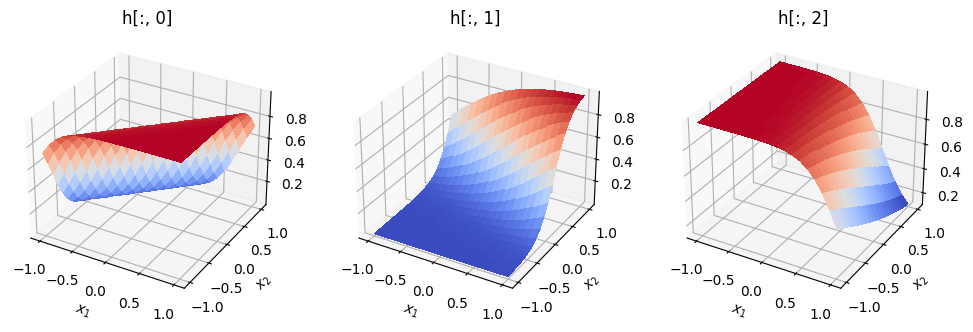

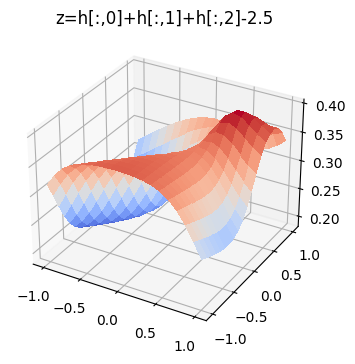

In [51]:
# Part c) Nothing to code.
from matplotlib import cm, pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 4), subplot_kw={"projection": "3d"})
ax[0].plot_surface(X1, X2, h[:, 0].view(20, 20), 
                   cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax[1].plot_surface(X1, X2, h[:, 1].view(20, 20), 
                   cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax[2].plot_surface(X1, X2, h[:, 2].view(20, 20), 
                   cmap=cm.coolwarm, linewidth=0, antialiased=False)
for i in range(3):
    ax[i].set_title(f'h[:, {i}]')
    ax[i].set_xlabel('$x_1$')
    ax[i].set_ylabel('$x_2$')

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={"projection": "3d"})
ax.plot_surface(X1, X2, z[:, 0].view(20, 20), 
                   cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title('z=h[:,0]+h[:,1]+h[:,2]-2.5');

**Question:** How do the directions of increase of the hidden neurons relate to the weight matrix?

**Answer:** 

In [ ]:
# Part d) How to increase output of the model at x=(1,-1) by changing the weights? Which weights to change, and how?
w1 = torch.from_numpy(...)
b1 = torch.from_numpy(...)
w2 = torch.from_numpy(...)
b2 = torch.from_numpy(...)

# Recompute outputs (reuse code from part b)
u1 = X@w1 + b1
h = torch.sigmoid(u1)
u2 = h @ w2 + b2
z = torch.sigmoid(u2)

# Plot again to vizualize the results. Did the output at x=(1,-1) increased?
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={"projection": "3d"})
ax.plot_surface(X1, X2, z[:, 0].view(20, 20), 
                   cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title('z=2*h[:,0]+h[:,1]+h[:,2]-2.5');
ax.set_xlabel('$x_1$');
ax.set_ylabel('$x_2$');